<a href="https://colab.research.google.com/github/VanTrung3007/AI/blob/main/NhanDangFoodVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from keras.layers import LeakyReLU
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Data/VNfood

/content/drive/MyDrive/Data/VNfood


In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training=train_data.flow_from_directory('/content/drive/MyDrive/Data/VNfood',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 84 images belonging to 10 classes.


In [ ]:
training.class_indices

{'banhcuon': 0,
 'banhmi': 1,
 'bunbo': 2,
 'bundaumamtom': 3,
 'comga': 4,
 'comtam': 5,
 'goicuon': 6,
 'hutieu': 7,
 'myxao': 8,
 'phalau': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 50 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
train=model.fit(training,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
3/3 [==============================] - 34s 15s/step - loss: 26.4665 - accuracy: 0.0952
Epoch 2/50
3/3 [==============================] - 8s 3s/step - loss: 12.8964 - accuracy: 0.1071
Epoch 3/50
3/3 [==============================] - 6s 2s/step - loss: 2.8480 - accuracy: 0.1310
Epoch 4/50
3/3 [==============================] - 7s 2s/step - loss: 2.3336 - accuracy: 0.1190
Epoch 5/50
3/3 [==============================] - 8s 3s/step - loss: 2.2286 - accuracy: 0.1548
Epoch 6/50
3/3 [==============================] - 6s 2s/step - loss: 2.1538 - accuracy: 0.2500
Epoch 7/50
3/3 [==============================] - 8s 2s/step - loss: 1.9992 - accuracy: 0.2738
Epoch 8/50
3/3 [==============================] - 6s 2s/step - loss: 1.7342 - accuracy: 0.4881
Epoch 9/50
3/3 [==============================] - 8s 2s/step - loss: 1.6138 - accuracy: 0.5000
Epoch 10/50
3/3 [==============================] - 6s 2s/step - loss: 1.5393 - accuracy: 0.5357
Epoch 11/50
3/3 [============================

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.05057564377784729
Train Accuracy 0.988095223903656


In [ ]:
# Lưu 
model.save("FoodVN.h5")

In [29]:
model_1=load_model('/content/drive/MyDrive/Data/VNfood/FoodVN.h5')

1/1 [==============================] - 0s 386ms/step
myxao


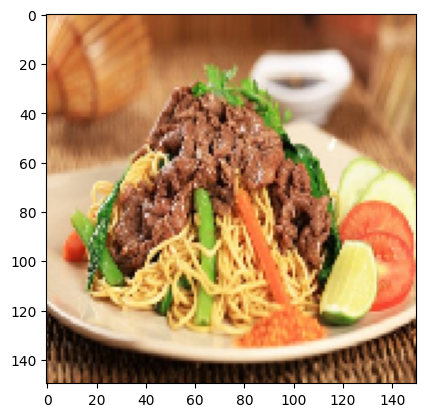

1/1 [==============================] - 0s 64ms/step
comga


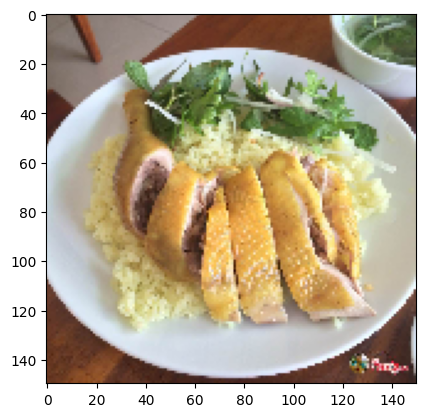

1/1 [==============================] - 0s 77ms/step
hutieu


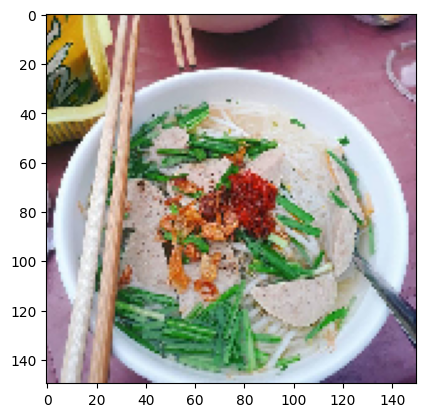

1/1 [==============================] - 0s 62ms/step
bundaumamtom


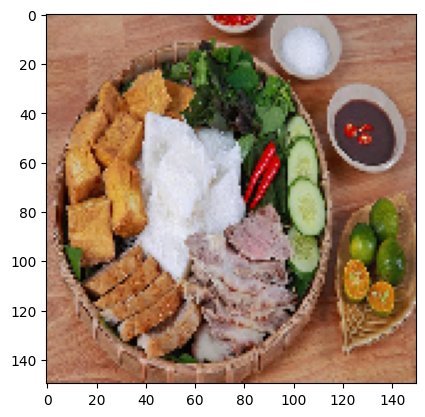

1/1 [==============================] - 0s 186ms/step
banhcuon


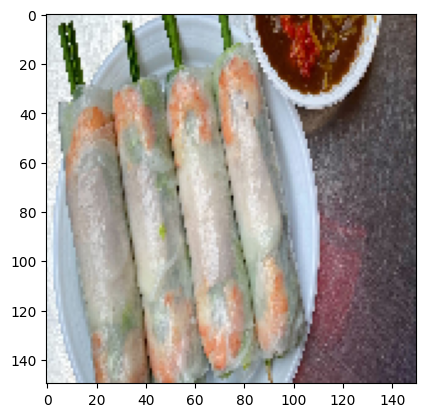

1/1 [==============================] - 0s 181ms/step
comtam


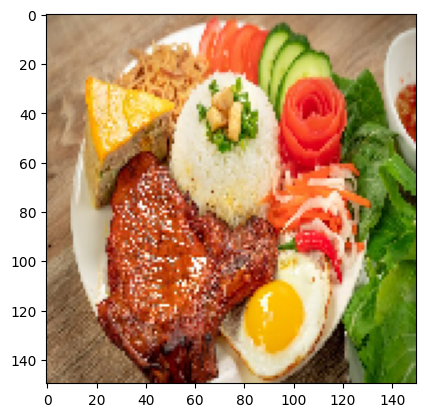

In [30]:
folder="/content/drive/MyDrive/Data/food_test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['banhcuon','banhmi','bunbo','bundaumamtom','comga','comtam','goicuon','hutieu','myxao','phalau']
  print(class_name[result])
  plt.show()